# Insights into the Apartment Rental Market: Exploring Trends and Predicting Rental Prices

In [173]:
%matplotlib inline

In [174]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 01. Data Collection

### Introduction - Data Collection:

In the ever-evolving real estate landscape, the availability of data plays a crucial role in understanding the dynamics of the rental market. This data science project aims to analyze and gain insights from a comprehensive dataset on apartments available for rent. To achieve this, we will collect data from the provided dataset hosted on the UCI Machine Learning Repository.

In [175]:
dataset_path = 'data/apartments_for_rent_in_USA.csv'

try:
    apartments_usa = pd.read_csv(dataset_path, sep=";", encoding='cp1252')
    print(apartments_usa.head(5))
except Exception as e:
    print("Error reading the dataset:", e)

           id                category  \
0  5668626895  housing/rent/apartment   
1  5664597177  housing/rent/apartment   
2  5668626833  housing/rent/apartment   
3  5659918074  housing/rent/apartment   
4  5668626759  housing/rent/apartment   

                                               title  \
0  Studio apartment 2nd St NE, Uhland Terrace NE,...   
1                  Studio apartment 814 Schutte Road   
2  Studio apartment N Scott St, 14th St N, Arling...   
3                     Studio apartment 1717 12th Ave   
4  Studio apartment Washington Blvd, N Cleveland ...   

                                                body amenities  bathrooms  \
0  This unit is located at second St NE, Uhland T...       NaN        NaN   
1  This unit is located at 814 Schutte Road, Evan...       NaN        NaN   
2  This unit is located at N Scott St, 14th St N,...       NaN        1.0   
3  This unit is located at 1717 12th Ave, Seattle...       NaN        1.0   
4  This unit is located at Wash

In [176]:
dataset_path = 'data/apartments_for_rent_in_GERMANY.csv'

try:
    apartments_de = pd.read_csv(dataset_path)
    print(apartments_de.head(5))
except Exception as e:
    print("Error reading the dataset:", e)

                regio1  serviceCharge                     heatingType  \
0  Nordrhein_Westfalen         245.00                 central_heating   
1      Rheinland_Pfalz         134.00  self_contained_central_heating   
2              Sachsen         255.00                   floor_heating   
3              Sachsen          58.15                district_heating   
4               Bremen         138.00  self_contained_central_heating   

  telekomTvOffer  telekomHybridUploadSpeed  newlyConst  balcony  picturecount  \
0  ONE_YEAR_FREE                       NaN       False    False             6   
1  ONE_YEAR_FREE                       NaN       False     True             8   
2  ONE_YEAR_FREE                      10.0        True     True             8   
3  ONE_YEAR_FREE                       NaN       False     True             9   
4            NaN                       NaN       False     True            19   

   pricetrend  telekomUploadSpeed  ...               regio2  \
0        4.

### Dataset Source:

The dataset we will be working with is sourced from the UCI Machine Learning Repository and is specifically focused on apartment rentals. The dataset comprises a diverse range of attributes associated with apartments, including details about their location, physical characteristics, amenities, and, most importantly, their rental prices. This collection of information presents an exciting opportunity to explore and uncover patterns that influence rental pricing, identify key features that drive value, and ultimately, offer valuable insights to both landlords and prospective tenants.

### Data Collection Process:

The data collection process involves accessing the dataset from the UCI repository, ensuring its integrity, and loading it into our Python environment using the powerful data manipulation library, Pandas. By following stringent data collection procedures, we ensure that the dataset is clean, reliable, and appropriate for analysis.

## 02. Data Understanding and Exploration

Understanding and exploring the dataset are crucial steps in any data science project. In this phase, we will dive deep into the dataset obtained during the data collection phase. By thoroughly understanding the data's structure, quality, and relationships between variables, we can lay a solid foundation for further analysis and model building.

### 01.Data Overview

This is a load the dataset into a Pandas DataFrame and examine its dimensions (number of rows and columns).

In [177]:
apartments_usa.dtypes

id                 int64
category          object
title             object
body              object
amenities         object
bathrooms        float64
bedrooms         float64
currency          object
fee               object
has_photo         object
pets_allowed      object
price              int64
price_display     object
price_type        object
square_feet        int64
address           object
cityname          object
state             object
latitude         float64
longitude        float64
source            object
time               int64
dtype: object

In [178]:
apartments_de.dtypes

regio1                       object
serviceCharge               float64
heatingType                  object
telekomTvOffer               object
telekomHybridUploadSpeed    float64
newlyConst                     bool
balcony                        bool
picturecount                  int64
pricetrend                  float64
telekomUploadSpeed          float64
totalRent                   float64
yearConstructed             float64
scoutId                       int64
noParkSpaces                float64
firingTypes                  object
hasKitchen                     bool
geo_bln                      object
cellar                         bool
yearConstructedRange        float64
baseRent                    float64
houseNumber                  object
livingSpace                 float64
geo_krs                      object
condition                    object
interiorQual                 object
petsAllowed                  object
street                       object
streetPlain                 

I need to see dimensions of my datasets

In [179]:
apartments_usa.shape

(10000, 22)

In [180]:
apartments_de.shape

(268850, 49)

This are first five rows of datasets to see data structure and content

In [181]:
apartments_usa.head(5)

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


In [182]:
apartments_de.head(5)

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


My datasets column names

In [183]:
apartments_usa.columns

Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time'],
      dtype='object')

In [184]:
apartments_de.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln',
       'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'],
      dtype='object')

I will use `df.info()` to obtain information about the data types of each column and check for any missing values.

In [185]:
apartments_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   5837 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null   object 
 18  latitud

In [186]:
apartments_de.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

I will generate descriptive statistics using `df.describe()` to gain insights into the central tendencies, spread, and distributions of numerical variables.

In [187]:
apartments_usa.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,1.000000e+04,9966.000000,9993.000000,10000.000000,10000.000000,9990.000000,9990.000000,1.000000e+04
mean,5.623396e+09,1.380544,1.744021,1486.277500,945.810500,37.695162,-94.652247,1.574891e+09
std,7.021025e+07,0.615410,0.942354,1076.507968,655.755736,5.495851,15.759805,3.762395e+06
min,5.508654e+09,1.000000,0.000000,200.000000,101.000000,21.315500,-158.022100,1.568744e+09
25%,5.509248e+09,1.000000,1.000000,949.000000,649.000000,33.679850,-101.301700,1.568781e+09
50%,5.668610e+09,1.000000,2.000000,1270.000000,802.000000,38.809800,-93.651600,1.577358e+09
75%,5.668626e+09,2.000000,2.000000,1695.000000,1100.000000,41.349800,-82.209975,1.577359e+09
max,5.668663e+09,8.500000,9.000000,52500.000000,40000.000000,61.594000,-70.191600,1.577362e+09


In [188]:
apartments_de.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,...,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,...,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,...,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,...,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,...,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,...,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,...,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,...,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


In [189]:
apartments_usa.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10000.0,5.623396e+09,7.021025e+07,5.508654e+09,5.509248e+09,5.668610e+09,5.668626e+09,5.668663e+09
bathrooms,9966.0,1.380544e+00,6.154099e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,8.500000e+00
bedrooms,9993.0,1.744021e+00,9.423539e-01,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,9.000000e+00
price,10000.0,1.486277e+03,1.076508e+03,2.000000e+02,9.490000e+02,1.270000e+03,1.695000e+03,5.250000e+04
square_feet,10000.0,9.458105e+02,6.557557e+02,1.010000e+02,6.490000e+02,8.020000e+02,1.100000e+03,4.000000e+04
latitude,9990.0,3.769516e+01,5.495851e+00,2.131550e+01,3.367985e+01,3.880980e+01,4.134980e+01,6.159400e+01
longitude,9990.0,-9.465225e+01,1.575980e+01,-1.580221e+02,-1.013017e+02,-9.365160e+01,-8.220998e+01,-7.019160e+01
time,10000.0,1.574891e+09,3.762395e+06,1.568744e+09,1.568781e+09,1.577358e+09,1.577359e+09,1.577362e+09


In [190]:
apartments_de.describe().T

,count,mean,std,min,25%,50%,75%,max
serviceCharge,261941.0,1.512061e+02,3.082958e+02,0.000000e+00,9.500000e+01,1.350000e+02,1.900000e+02,1.461180e+05
telekomHybridUploadSpeed,45020.0,1.000000e+01,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01
picturecount,268850.0,9.791958e+00,6.408399e+00,0.000000e+00,6.000000e+00,9.000000e+00,1.300000e+01,1.210000e+02
pricetrend,267018.0,3.389001e+00,1.964874e+00,-1.233000e+01,2.000000e+00,3.390000e+00,4.570000e+00,1.492000e+01
telekomUploadSpeed,235492.0,2.880493e+01,1.633715e+01,1.000000e+00,1.000000e+01,4.000000e+01,4.000000e+01,1.000000e+02
totalRent,228333.0,9.013315e+02,3.323833e+04,0.000000e+00,4.698000e+02,6.500000e+02,9.850000e+02,1.575154e+07
yearConstructed,211805.0,1.966401e+03,4.699221e+01,1.000000e+03,1.950000e+03,1.973000e+03,1.996000e+03,2.090000e+03
scoutId,268850.0,1.069697e+08,1.250093e+07,2.887174e+07,1.066910e+08,1.111584e+08,1.137688e+08,1.157117e+08
noParkSpaces,93052.0,1.327634e+00,8.361403e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.241000e+03
yearConstructedRange,211805.0,3.714544e+00,2.738134e+00,1.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,9.000000e+00


## 03. Data Cleaning and Preprocessing

Data cleaning and preprocessing are essential steps to ensure that the dataset is suitable for analysis and model building. In this phase, we will address any data quality issues, handle missing values, and prepare the dataset for further exploration and modeling.

Here I will Identify columns with missing values using `df.isnull().sum()` to understand the extent of missing data.

In [191]:
apartments_usa.isnull().sum()

id                  0
category            0
title               0
body                0
amenities        3549
bathrooms          34
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     4163
price               0
price_display       0
price_type          0
square_feet         0
address          3327
cityname           77
state              77
latitude           10
longitude          10
source              0
time                0
dtype: int64

In [192]:
apartments_de.isnull().sum()

regio1                           0
serviceCharge                 6909
heatingType                  44856
telekomTvOffer               32619
telekomHybridUploadSpeed    223830
newlyConst                       0
balcony                          0
picturecount                     0
pricetrend                    1832
telekomUploadSpeed           33358
totalRent                    40517
yearConstructed              57045
scoutId                          0
noParkSpaces                175798
firingTypes                  56964
hasKitchen                       0
geo_bln                          0
cellar                           0
yearConstructedRange         57045
baseRent                         0
houseNumber                  71018
livingSpace                      0
geo_krs                          0
condition                    68489
interiorQual                112665
petsAllowed                 114573
street                           0
streetPlain                  71013
lift                

In this phase, we focus on ensuring the dataset is well-structured, relevant, and free from unnecessary clutter. By removing specific columns that add little value or are redundant, we streamline the data for further analysis and model building. Based on the objectives and context of your analysis, i will remove some columns that are not relevant or contribute minimally to the project. This include columns with excessive missing values or redundant information.

In [193]:
columns_to_remove_usa = ['id', 'category', 'body', 'fee', 'has_photo', 'price_display', 'address', 'time']
new_apartments_usa = apartments_usa.drop(columns=columns_to_remove_usa)

In [194]:
columns_to_remove_de = [
    'serviceCharge',
    'telekomTvOffer',
    'telekomHybridUploadSpeed',
    'newlyConst',
    'picturecount',
    'telekomUploadSpeed',
    'heatingCosts',
    'energyEfficiencyClass',
    'lastRefurbish',
    'date',
    'electricityKwhPrice',
    'electricityBasePrice',
    'facilities',
    'scoutId',
    'heatingType',
    'yearConstructed',
    'firingTypes',
    'yearConstructedRange',
    'regio2',
    'regio3',
    'description',
    'geo_bln',
    'pricetrend',
    'houseNumber',
    'geo_krs',
    'condition',
    'noParkSpaces',
    'interiorQual',
    'street',
    'streetPlain',
    'baseRentRange',
    'baseRent',
    'geo_plz',
    'thermalChar',
    'livingSpaceRange',
    'noRoomsRange',
    ]
new_apartments_de = apartments_de.drop(columns=columns_to_remove_de)

In [195]:
new_apartments_usa

,title,amenities,bathrooms,bedrooms,currency,pets_allowed,price,price_type,square_feet,cityname,state,latitude,longitude,source
0,"Studio apartment 2nd St NE, Uhland Terrace NE,...",NaN,NaN,0.0,USD,NaN,790,Monthly,101,Washington,DC,38.9057,-76.9861,RentLingo
1,Studio apartment 814 Schutte Road,NaN,NaN,1.0,USD,NaN,425,Monthly,106,Evansville,IN,37.9680,-87.6621,RentLingo
2,"Studio apartment N Scott St, 14th St N, Arling...",NaN,1.0,0.0,USD,NaN,1390,Monthly,107,Arlington,VA,38.8910,-77.0816,RentLingo
3,Studio apartment 1717 12th Ave,NaN,1.0,0.0,USD,NaN,925,Monthly,116,Seattle,WA,47.6160,-122.3275,RentLingo
4,"Studio apartment Washington Blvd, N Cleveland ...",NaN,NaN,0.0,USD,NaN,880,Monthly,125,Arlington,VA,38.8738,-77.1055,RentLingo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Five BR 5407 Abbott Place - Abbott,NaN,4.0,5.0,USD,NaN,6000,Monthly,6300,Edina,MN,44.9000,-93.3233,RentLingo
9996,Six BR 256 Las Entradas,NaN,8.0,6.0,USD,NaN,25000,Monthly,8716,Montecito,CA,34.4331,-119.6331,RentLingo
9997,Six BR 9908 Bentcross Drive,NaN,8.5,6.0,USD,NaN,11000,Monthly,11318,Potomac,MD,39.0287,-77.2409,RentLingo
9998,One BR in New York NY 10069,"Basketball,Cable or Satellite,Doorman,Hot Tub,...",NaN,1.0,USD,NaN,4790,Monthly,40000,New York,NY,40.7716,-73.9876,Listanza


In [196]:
new_apartments_de

,regio1,balcony,totalRent,hasKitchen,cellar,livingSpace,petsAllowed,lift,typeOfFlat,noRooms,floor,numberOfFloors,garden
0,Nordrhein_Westfalen,False,840.0,False,True,86.00,NaN,False,ground_floor,4.0,1.0,3.0,True
1,Rheinland_Pfalz,True,NaN,False,False,89.00,no,False,ground_floor,3.0,NaN,NaN,False
2,Sachsen,True,1300.0,False,True,83.80,NaN,True,apartment,3.0,3.0,4.0,False
3,Sachsen,True,NaN,False,False,58.15,NaN,False,other,3.0,3.0,NaN,False
4,Bremen,True,903.0,False,False,84.97,NaN,False,apartment,3.0,1.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,True,910.0,False,True,90.00,no,False,roof_storey,3.0,NaN,NaN,False
268846,Hessen,True,1150.0,True,False,115.00,negotiable,False,apartment,3.5,1.0,1.0,False
268847,Hessen,True,930.0,False,True,95.00,negotiable,False,apartment,4.0,1.0,2.0,True
268848,Nordrhein_Westfalen,True,1015.0,False,True,70.00,no,True,apartment,2.0,NaN,5.0,False


Checking columns type

In [197]:
new_apartments_usa.dtypes

title            object
amenities        object
bathrooms       float64
bedrooms        float64
currency         object
pets_allowed     object
price             int64
price_type       object
square_feet       int64
cityname         object
state            object
latitude        float64
longitude       float64
source           object
dtype: object

In [198]:
new_apartments_de.dtypes

regio1             object
balcony              bool
totalRent         float64
hasKitchen           bool
cellar               bool
livingSpace       float64
petsAllowed        object
lift                 bool
typeOfFlat         object
noRooms           float64
floor             float64
numberOfFloors    float64
garden               bool
dtype: object

I will use the `astype()` method to explicitly convert the columns to the "string" data type (str).

In [199]:
new_apartments_usa['title'] = new_apartments_usa['title'].astype('string')
new_apartments_usa['amenities'] = new_apartments_usa['amenities'].astype('string')
new_apartments_usa['cityname'] = new_apartments_usa['cityname'].astype('string')
new_apartments_usa['state'] = new_apartments_usa['state'].astype('string')
new_apartments_usa['source'] = new_apartments_usa['source'].astype('string')

In [200]:
new_apartments_de['regio1'] = new_apartments_de['regio1'].astype('string')
new_apartments_de['petsAllowed'] = new_apartments_de['petsAllowed'].astype('string')
new_apartments_de['typeOfFlat'] = new_apartments_de['typeOfFlat'].astype('string')

In [201]:
new_apartments_usa

,title,amenities,bathrooms,bedrooms,currency,pets_allowed,price,price_type,square_feet,cityname,state,latitude,longitude,source
0,"Studio apartment 2nd St NE, Uhland Terrace NE,...",<NA>,NaN,0.0,USD,NaN,790,Monthly,101,Washington,DC,38.9057,-76.9861,RentLingo
1,Studio apartment 814 Schutte Road,<NA>,NaN,1.0,USD,NaN,425,Monthly,106,Evansville,IN,37.9680,-87.6621,RentLingo
2,"Studio apartment N Scott St, 14th St N, Arling...",<NA>,1.0,0.0,USD,NaN,1390,Monthly,107,Arlington,VA,38.8910,-77.0816,RentLingo
3,Studio apartment 1717 12th Ave,<NA>,1.0,0.0,USD,NaN,925,Monthly,116,Seattle,WA,47.6160,-122.3275,RentLingo
4,"Studio apartment Washington Blvd, N Cleveland ...",<NA>,NaN,0.0,USD,NaN,880,Monthly,125,Arlington,VA,38.8738,-77.1055,RentLingo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Five BR 5407 Abbott Place - Abbott,<NA>,4.0,5.0,USD,NaN,6000,Monthly,6300,Edina,MN,44.9000,-93.3233,RentLingo
9996,Six BR 256 Las Entradas,<NA>,8.0,6.0,USD,NaN,25000,Monthly,8716,Montecito,CA,34.4331,-119.6331,RentLingo
9997,Six BR 9908 Bentcross Drive,<NA>,8.5,6.0,USD,NaN,11000,Monthly,11318,Potomac,MD,39.0287,-77.2409,RentLingo
9998,One BR in New York NY 10069,"Basketball,Cable or Satellite,Doorman,Hot Tub,...",NaN,1.0,USD,NaN,4790,Monthly,40000,New York,NY,40.7716,-73.9876,Listanza


In [202]:
new_apartments_de

,regio1,balcony,totalRent,hasKitchen,cellar,livingSpace,petsAllowed,lift,typeOfFlat,noRooms,floor,numberOfFloors,garden
0,Nordrhein_Westfalen,False,840.0,False,True,86.00,<NA>,False,ground_floor,4.0,1.0,3.0,True
1,Rheinland_Pfalz,True,NaN,False,False,89.00,no,False,ground_floor,3.0,NaN,NaN,False
2,Sachsen,True,1300.0,False,True,83.80,<NA>,True,apartment,3.0,3.0,4.0,False
3,Sachsen,True,NaN,False,False,58.15,<NA>,False,other,3.0,3.0,NaN,False
4,Bremen,True,903.0,False,False,84.97,<NA>,False,apartment,3.0,1.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,True,910.0,False,True,90.00,no,False,roof_storey,3.0,NaN,NaN,False
268846,Hessen,True,1150.0,True,False,115.00,negotiable,False,apartment,3.5,1.0,1.0,False
268847,Hessen,True,930.0,False,True,95.00,negotiable,False,apartment,4.0,1.0,2.0,True
268848,Nordrhein_Westfalen,True,1015.0,False,True,70.00,no,True,apartment,2.0,NaN,5.0,False


In [203]:
new_apartments_usa.dtypes

title           string[python]
amenities       string[python]
bathrooms              float64
bedrooms               float64
currency                object
pets_allowed            object
price                    int64
price_type              object
square_feet              int64
cityname        string[python]
state           string[python]
latitude               float64
longitude              float64
source          string[python]
dtype: object

In [204]:
new_apartments_de.dtypes

regio1            string[python]
balcony                     bool
totalRent                float64
hasKitchen                  bool
cellar                      bool
livingSpace              float64
petsAllowed       string[python]
lift                        bool
typeOfFlat        string[python]
noRooms                  float64
floor                    float64
numberOfFloors           float64
garden                      bool
dtype: object

## 04. Data Visualization:

Data visualization is a powerful tool that allows us to gain insights, identify patterns, and communicate findings effectively. In this phase, we will create various visualizations to explore and understand the dataset's characteristics, relationships, and distributions.

### USA Visualization

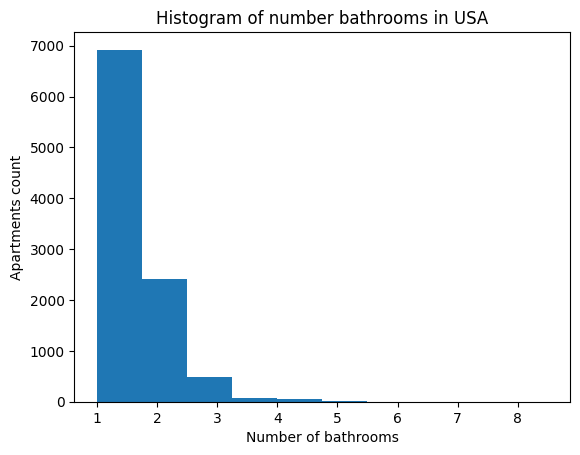

In [205]:
plt.hist(new_apartments_usa["bathrooms"])

plt.title('Histogram of number bathrooms in USA')
plt.xlabel("Number of bathrooms")
plt.ylabel("Apartments count")

plt.show()

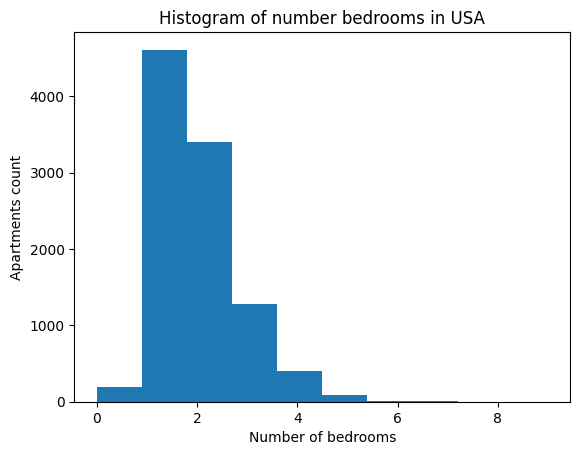

In [206]:
plt.hist(new_apartments_usa["bedrooms"])

plt.title('Histogram of number bedrooms in USA')
plt.xlabel("Number of bedrooms")
plt.ylabel("Apartments count")

plt.show()

In [207]:
new_apartments_usa.dropna(inplace=True)

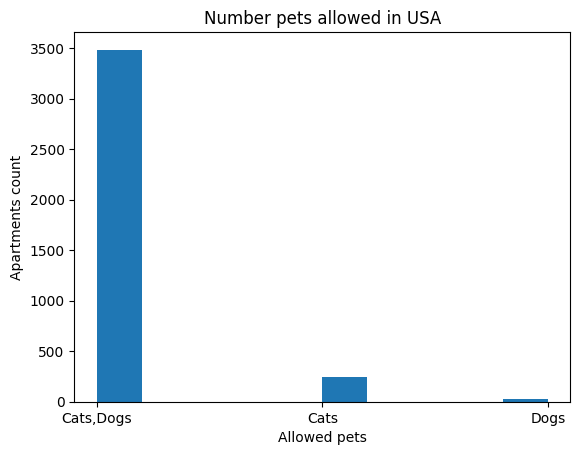

In [208]:
plt.hist(new_apartments_usa["pets_allowed"])

plt.title('Number pets allowed in USA')
plt.xlabel("Allowed pets")
plt.ylabel("Apartments count")

plt.show()

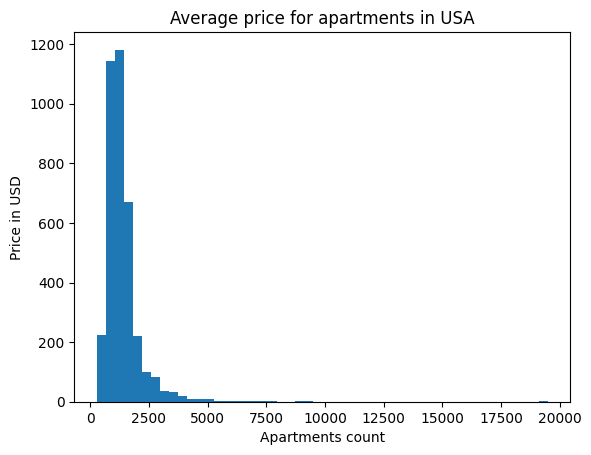

In [209]:
plt.hist(new_apartments_usa["price"], bins=50)

plt.title('Average price for apartments in USA')
plt.xlabel("Apartments count")
plt.ylabel("Price in USD")

plt.show()

In [210]:
new_apartments_usa["price"].mean()

1371.7621204049015

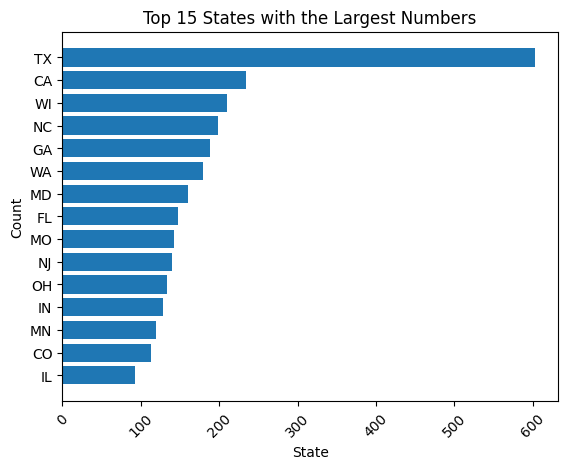

In [211]:
state_counts = new_apartments_usa['state'].value_counts()
n = 15
top_n_states = state_counts.nlargest(n)

plt.barh(top_n_states.index, top_n_states.values)
plt.xlabel('State')
plt.ylabel('Count')
plt.title(f'Top {n} States with the Largest Numbers')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()

plt.show()

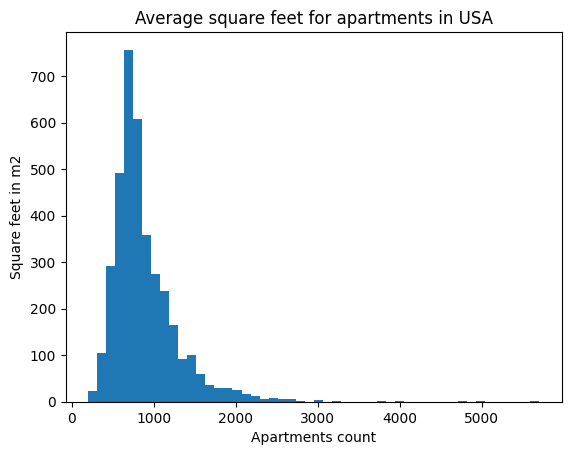

In [212]:
plt.hist(new_apartments_usa["square_feet"], bins=50)

plt.title('Average square feet for apartments in USA')
plt.xlabel("Apartments count")
plt.ylabel("Square feet in m2")

plt.show()

In [213]:
new_apartments_usa['square_feet'].mean()

886.0578050079914

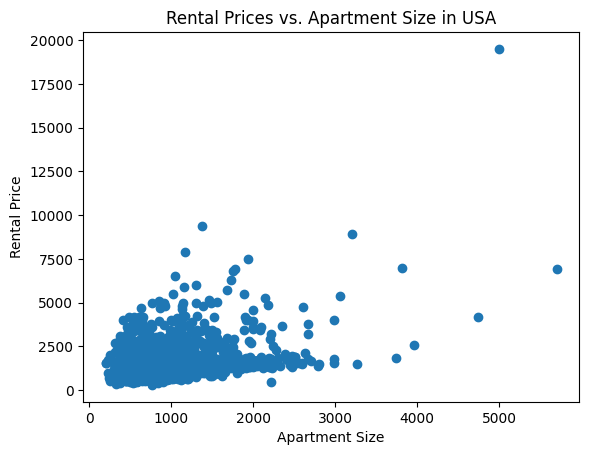

In [214]:
plt.scatter(new_apartments_usa['square_feet'], new_apartments_usa['price'])

plt.xlabel('Apartment Size')
plt.ylabel('Rental Price')

plt.title('Rental Prices vs. Apartment Size in USA')
plt.show()

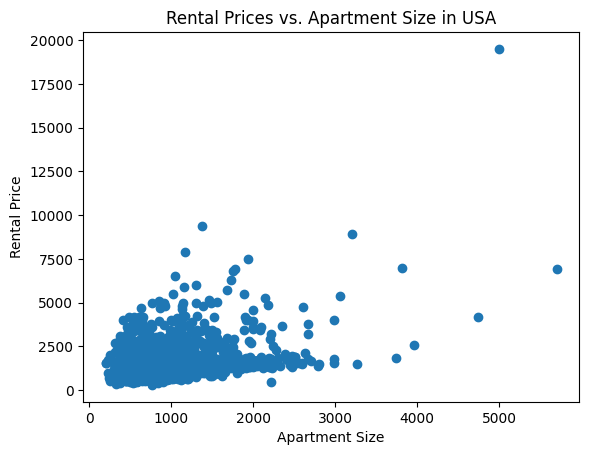

In [215]:
plt.scatter(new_apartments_usa['square_feet'], new_apartments_usa['price'])

plt.xlabel('Apartment Size')
plt.ylabel('Rental Price')

plt.title('Rental Prices vs. Apartment Size in USA')
plt.show()

### Germany Visualization

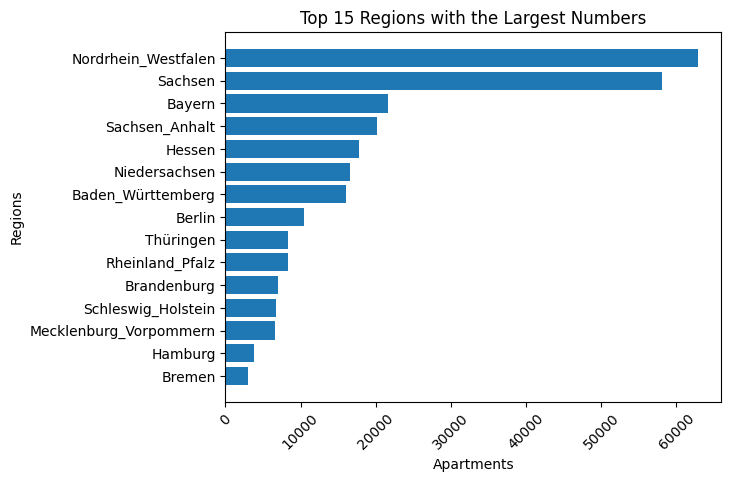

In [216]:
state_counts = new_apartments_de['regio1'].value_counts()
n = 15
top_n_states = state_counts.nlargest(n)

plt.barh(top_n_states.index, top_n_states.values)
plt.xlabel('Apartments')
plt.ylabel('Regions')
plt.title(f'Top {n} Regions with the Largest Numbers')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()

plt.show()


In [217]:
new_apartments_de.dropna(inplace=True)

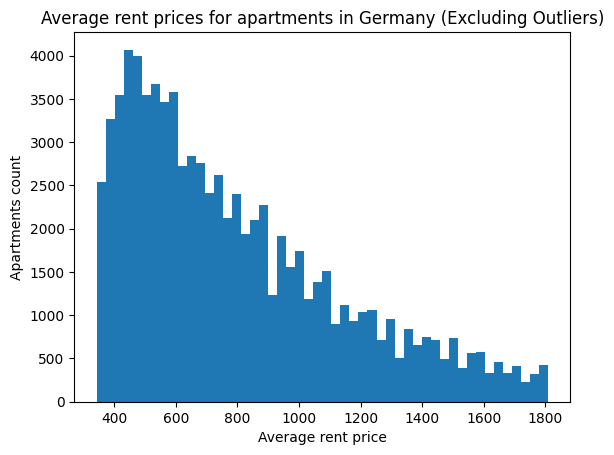

In [258]:
low_quantile = new_apartments_de["totalRent"].quantile(0.05)  # Filter out the lowest 5% of values
high_quantile = new_apartments_de["totalRent"].quantile(0.95)  # Filter out the highest 5% of values

filtered_data = new_apartments_de[(new_apartments_de["totalRent"] >= low_quantile) & (new_apartments_de["totalRent"] <= high_quantile)]

plt.hist(filtered_data["totalRent"], bins=50)

plt.title('Average rent prices for apartments in Germany (Excluding Outliers)')
plt.xlabel("Average rent price")
plt.ylabel("Apartments count")

plt.show()

In [259]:
new_apartments_de['totalRent'].mean()

1046.770156289526

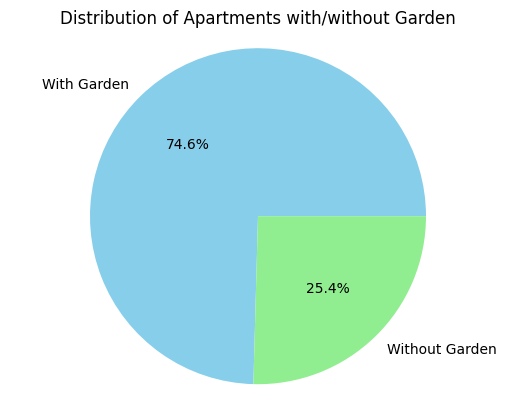

In [241]:
garden_counts = new_apartments_de['garden'].value_counts()

colors = ['skyblue', 'lightgreen']

labels = ['With Garden', 'Without Garden']

plt.pie(garden_counts, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of Apartments with/without Garden')
plt.axis('equal')
plt.show()

In [243]:
new_apartments_de['garden'].value_counts()

garden
False    67792
True     23129
Name: count, dtype: int64

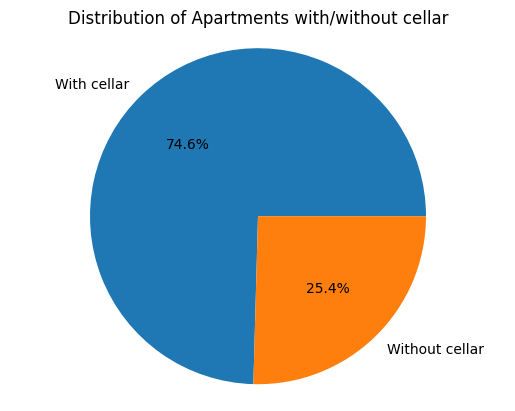

In [262]:
cellar_counts = new_apartments_de['cellar'].value_counts()

labels = ['With cellar', 'Without cellar']


plt.pie(garden_counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Apartments with/without cellar')
plt.axis('equal')
plt.show()

In [261]:
new_apartments_de['cellar'].value_counts()

cellar
True     66490
False    24431
Name: count, dtype: int64

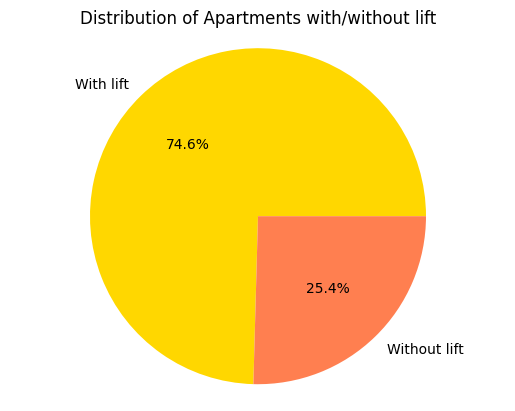

In [270]:
lift_counts = new_apartments_de['lift'].value_counts()

labels = ['With lift', 'Without lift']
colors = ['Gold', 'Coral']

plt.pie(garden_counts, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of Apartments with/without lift')
plt.axis('equal')

plt.show()

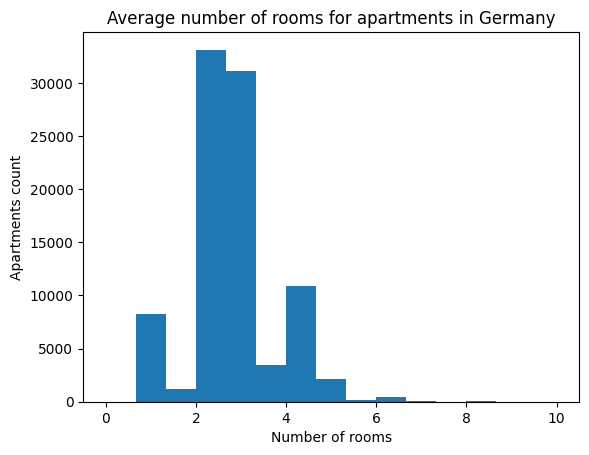

In [254]:
plt.hist(new_apartments_de["noRooms"], bins=15, range=(0,10))

plt.title('Average number of rooms for apartments in Germany')
plt.xlabel("Number of rooms")
plt.ylabel("Apartments count")

plt.show()

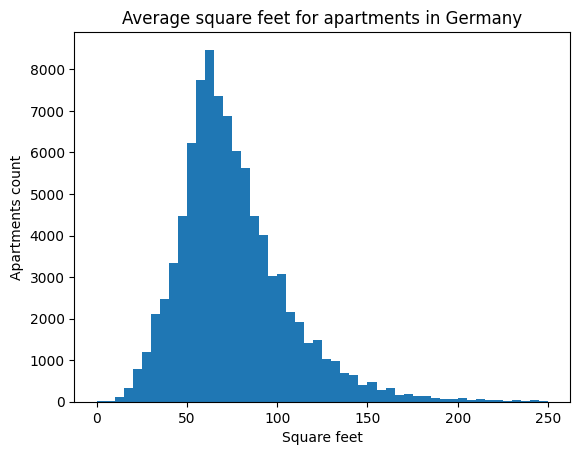

In [277]:
plt.hist(new_apartments_de["livingSpace"], bins=50, range=(0,250))

plt.title('Average square feet for apartments in Germany')
plt.xlabel("Square feet")
plt.ylabel("Apartments count")

plt.show()

In [278]:
new_apartments_de['livingSpace'].mean()

76.2913855984866

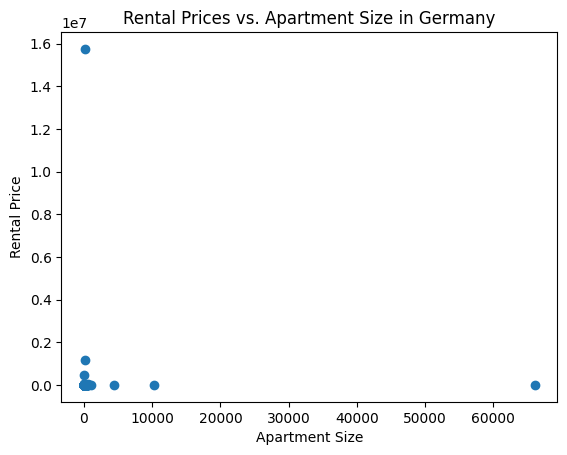

In [221]:
plt.scatter(new_apartments_de['livingSpace'], new_apartments_de['totalRent'])

plt.xlabel('Apartment Size')
plt.ylabel('Rental Price')

plt.title('Rental Prices vs. Apartment Size in Germany')
plt.show()

## 05. Model Building:

I will define a clear objective for the analysis, such as predicting rental prices.
Split the dataset into training and testing sets.
Select appropriate regression models like Linear Regression, Random Forest Regression, or XGBoost.
Train the models on the training data and evaluate their performance using metrics like Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), etc.
Optimize hyperparameters using techniques like cross-validation and grid search.


## 06. Model Evaluation and Interpretation:

Evaluate the model's performance on the test set and analyze the results.
Interpret the model coefficients or feature importances to understand which factors most strongly influence rental prices.


## 07. Insights and Recommendations:

I will summarize the key insights gained from the analysis.
Must provide recommendations to property owners, renters, or real estate agents based on the findings.


## 08. Visualization of Results:

Create interactive visualizations and dashboards to present the results effectively.
